# Plotting

In this notebook, we'll start plotting things out using the `matplotlib` library. 

Most notebooks will add lines like the below at the start, to indicate early on what modules have been imported. You want to do this early on for neatness and for others to know what modules they need to run your code, so even if you realise later on that you want to add modules, you should still come all the way to the top and import them.

`%matplotlib inline` is a special command that configures the plotting library, matplotlib, to show its results inline (i.e. show its results in this notebook itself).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv("gdp_asia.csv", index_col = "country")
data.head()

<hr>

### Plot using `plot()`

To plot, we just use the handy `plot()` function, built into each DataFrame:

In [ ]:
data.plot()

However, the graph looks like someone trampled all over some leaves. Our secondary school maths teachers would not be pleased. Let's fix things up a bit by making adjustments to the `plt` module. See if you can figure out what each line means.

Note the ordering--you plot _first_, in the first line, then you adjust the settings!

In [ ]:
# Without any adjustments.
data.loc["China",:].plot()

#### Making adjustments to the plot

In [ ]:
data.loc["China",:].plot()
plt.ylabel("GDP per capita of China")
plt.xlabel("Years")
plt.xticks(rotation=80)
# plt.xticks([]) # Disables xticks.
plt.legend()

#### Now, how about showing more than one country at a time? You can just plot each of them separately.

In [ ]:
# Where to find all these options?
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html
# contains a list of all matplotlib.pyplot functions

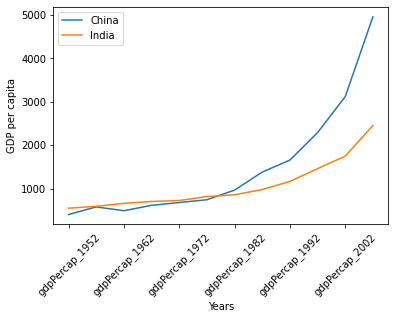

In [11]:
data.loc["China",:].plot()
data.loc["India",:].plot()
plt.ylabel("GDP per capita")
plt.xlabel("Years")
plt.xticks(rotation=45)
plt.legend(loc='best') # see https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html

### <font color="red">Exercise 1: Singapore and Neighbours</font>

Plot the GDP per capita growth of Singapore vs. 2 of our ASEAN neighbours. 

Look through the `.plot` [documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) to make Singapore's plot line red, please. Happy National Day!!!

HINT: Google "matplotlib line colour" to get good documentation

#### Exercise 1 Answer

In [ ]:
data.loc["Singapore",:].plot(color="red") 
data.loc["Malaysia",:].plot(color="#313131") 
data.loc["Thailand",:].plot()
plt.ylabel("GDP per capita")
plt.xlabel("Years")
plt.xticks(rotation=80)
plt.legend(loc='best') 
#HINT: Google "matplotlib line colour" to get good documentation

#### Exercise 1 alternate answer (using matplotlib.pyplot.plot() instead of DataFrame.plot())

In [ ]:
# list(len(data.columns))
# print(data.columns)

# Example of plt.plot() instead of DataFrame.plot()
plt.xticks(list(range(len(data.columns))), data.columns, rotation=80)

x_coords = data.columns
y_coords = data.loc["Singapore", :]
plt.plot(x_coords, y_coords, color="red", label="Singapore") # https://matplotlib.org/stable/gallery/lines_bars_and_markers/masked_demo.html#sphx-glr-gallery-lines-bars-and-markers-masked-demo-py

y_coords2 = data.loc["Malaysia", :]
plt.plot(x_coords, y_coords2, label="Malaysia")

y_coords3 = data.loc["Thailand", :]
plt.plot(x_coords, y_coords3, label="Thailand")

plt.xlabel("Years")
plt.ylabel("GDP per capita")

plt.legend(loc="best")

### <font color="red">Exercise 2: Minimum & Maximum GDP in Europe</font>

Fill in the blanks below to plot the minimum GDP per capita over time for all the countries in Europe. Modify it again to plot the maximum GDP per capita over time for Europe.

In [23]:
data_europe = pd.read_csv('gdp_europe.csv', index_col="country")

#### Exercise 2 Answer

In [ ]:
# hint: remember the .min() and .max() operations we could call on dataframes?
# data_europe.min()
# data_europe.max()

data_europe.min().plot(label='min')
data_europe.max().plot(label='max')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.xlabel("Years")
plt.ylabel("GDP per capita")

### <font color="red">Exercise 3: Other plots</font>

Try this out. What does this plot? What does the `s` parameter refer to? What is 1e6?

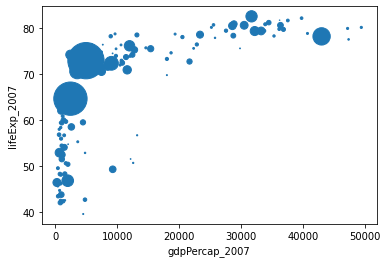

In [33]:
data_all = pd.read_csv('gdp_pop_all.csv', index_col="country")
data_all.plot(kind='scatter', x='gdpPercap_2007', y='lifeExp_2007',
              s=data_all['pop_2007']/1e6)

##### What is 1e6?

In [ ]:
# 1e6 is python's scientific notation

# This scientiic notation represents a float multiplied by the specified power of 10.
# For example:
#      1e3 = 1000.0    (1 * 10**3)
#      1e6 = 1000000.0
#      1e9 = 1000000000.0

# Steps you can take to find this on your own:
#  google 'python what is 1e6'
#  look for scientific notation mention (e.g. https://python-reference.readthedocs.io/en/latest/docs/float/scientific.html)
#  google python scientific notation
#  click on first result to get wiki

#### Adding preset styles to your plots
Thankfully, matplotlib also has some preset themes that we can use to make our plots looks nice.

In [ ]:
# We can customise the style of matplotlib using preset stylesheets:
# plt.style.use('stylenamehere')

# To see the list of available styles, just run:
print(plt.style.available)

#For example:
# plt.style.use('seaborn')
plt.style.use('fivethirtyeight')

data_europe.min().plot(label='min') 
data_europe.max().plot(label='max')
plt.xticks(rotation=45)
plt.legend(loc='best')

## Plot.ly

<p><b>Getting Started:</b> https://plotly.com/python/getting-started-with-chart-studio/</p>
<p><b>Full Documentation:</b> https://plotly.com/python/chart-studio/ </p>

Plotly is a data visualization toolbox that’s compatible with Jupyter notebooks. It has an offline mode that allows you to save plots locally inside Jupyter notebooks as well as an online mode that allows you to save plots to a Plotly account. Plotly is nice because you can dynamically zoom in on plot sections and hover over your plot to identify specific data points.

Note: when you save your notebooks with plotly plots inside them, they can be quite large (as it saves all the generated images inside the notebook). To save without the plots, simply clear your output by going to Cell > All Output > Clear.

#### Installing

**If using in Google Colab:**
Plotly is available by default.

**If using in Anaconda:**
The chart-studio module doesn't come with the default installation of Anaconda. To install, open Command Prompt (or Terminal if on Mac) with admin rights and run the following command: ``conda install -c plotly chart-studio``

As an example, to install chart-studio on my Anaconda installation on Windows, I had to:
1. Open Command Prompt with admin priviledges
2. Type: ``conda install -c plotly chart-studio``
3. When it asks for yes/no confirmation, type 'y'

If all goes well, you'll be able to import the libraries below!

In [37]:
#import modules
import pandas as pd
import plotly
import plotly.graph_objs as go

### <font color="red">Plotly Basics</font>

Remember our GDP plots up above using matplotlib? Let's try to reproduce them. We'll plot the GDP per capita growth of Singapore from 1952 to 2007 using plot.ly.

In [ ]:
data = pd.read_csv("gdp_asia.csv", index_col = "country")
#specify the x and y coordinates
x_coords = data.columns
y_coords = data.loc['Singapore', :]

#set up the data variable
data = [go.Scatter(x=x_coords, y=y_coords)]

#setup layout
layout = go.Layout()  #where we specify layout options, currently empty

fig = go.Figure(data = data)
fig.show()

##### How to customise?

In [ ]:
# Customising plotly plots

data = pd.read_csv("gdp_asia.csv", index_col = "country")

#specify the x and y coordinates
x_coords = data.columns
y_coords = data.loc['Singapore', :]

#set up the data variable
data = [go.Scatter(x=x_coords, y=y_coords,
                   marker={'color': 'red', 'symbol': 104, 'size': 10},
                   mode="markers+lines", 
                   text=["one","two","three", "something else"],
                   name='1st trace')]

#setup layout
layout = go.Layout(title="Insert Witty Title Here",
                   xaxis={'title':'time'},
                   yaxis={'title':'GDP Per Capita'})

fig = go.Figure(data = data, layout = layout)
fig.show()

Plotly has great documentation. For example, if you want more info on text and annotation options: plot.ly/python/text-and-annotations/ has many examples

### <font color="red">Exercise 4: Plotting Multiple Countries</font>

Plot the GDP per capita growth of Singapore alongside two other ASEAN countries from 1952 to 2007 using plotly.

Hint: You can add multiple lines by inserting multiple go.Scatter elements into your data list

#### Exercise 4 Answer

In [ ]:
# Hint: you can add multiple lines by inserting multiple go.Scatter elements into your data list 
data = pd.read_csv("gdp_asia.csv", index_col = "country")

#specify the x and y coordinates
x_coords = data.columns
y_coords1 = data.loc['Singapore', :]
y_coords2 = data.loc['Malaysia', :]
y_coords3 = data.loc['Thailand', :]

#set up the data variable
data = [go.Scatter(x=x_coords, y=y_coords1, name='Singapore'),
        go.Scatter(x=x_coords, y=y_coords2, name='Malaysia'),
        go.Scatter(x=x_coords, y=y_coords3, name='Thailand')]

#setup layout
layout = go.Layout()  #where we specify layout options

fig = go.Figure(data = data, layout = layout)
fig.show()

### <font color="red">Exercise 5A: Plotly Practice (Plotting a Bar Graph)</font>

So far we've only plotted scatter plots with plotly. What about a bar graph? You'll notice we use 'plotly.graph_objs.Scatter' in our above examples. To plot a bar graph, we'll use **plotly.graph_objs.Bar**. We'll be using the CSV located on plotly's GitHub below:

In [45]:
#Here's some starter code:

df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/school_earnings.csv")
df.head()
#This is a dataset hosted by plotly for practice use.

,School,Women,Men,Gap
0,MIT,94,152,58
1,Stanford,96,151,55
2,Harvard,112,165,53
3,U.Penn,92,141,49
4,Princeton,90,137,47


#### Exercise 5A Answer

In [ ]:
#Example
data = [go.Bar(x=df.School, y=df.Gap)]

fig = go.Figure(data = data)
fig.show()

### <font color="red">Exercise 5b: Plotly Practice</font>

Now try splitting the data into three separate bars per entry: one for men, one for women, and one for the gap. For example, under the MIT entry there will be three bars, under the Stanford entry there will be another 3 bars, and so on.

Hint: From the previous exercise, we know how to create 1 bar graph. So now we need to create 2 more for a total of 3.

#### Exercise 5B Answer

In [47]:
import plotly.graph_objs as go

df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/school_earnings.csv")

trace_women = go.Bar(x=df.School,
                  y=df.Women,
                  name='Women',
                  # marker=dict(color='#ffcdd2'))
                  marker={'color': '#ffcdd2'}) # Equivalent to marker=dict(color='#ffcdd2')

trace_men = go.Bar(x=df.School,
                y=df.Men,
                name='Men',
                marker=dict(color='#A2D5F2'))

trace_gap = go.Bar(x=df.School,
                y=df.Gap,
                name='Gap',
                marker=dict(color='#59606D'))

data = [trace_women, trace_men, trace_gap]

layout = go.Layout(title="Average Earnings for Graduates",
                xaxis=dict(title='School'),
                yaxis=dict(title='Salary (in thousands)'))

fig = go.Figure(data = data, layout = layout)
fig.show()

### More Features

### Formatting Plots (plotly.figure_factory)

Figure factories are for creating specific kinds of plots.
Here's an example of creating a table from a dataset.

In [48]:
import plotly.figure_factory as ff
data = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/school_earnings.csv")

table = ff.create_table(data)
table.show()

### Semi-Logarithmic Plots

In [49]:
import plotly
import pandas as pd
df = pd.read_csv('http://www.stat.ubc.ca/~jenny/notOcto/STAT545A/examples/gapminder/data/gapminderDataFiveYear.txt', sep='\t')
df2007 = df[df.year==2007]
df1952 = df[df.year==1952]
df.head(2)

fig = {
    'data': [
        {
            'x': df2007.gdpPercap, 
            'y': df2007.lifeExp, 
            'text': df2007.country, 
            'mode': 'markers', 
            'name': '2007'},
        {
            'x': df1952.gdpPercap, 
            'y': df1952.lifeExp, 
            'text': "df1952.country", 
            'mode': 'markers', 
            'name': '1952'}
    ],
    'layout': {
        'xaxis': {'title': 'GDP per Capita', 'type': 'log'},
        'yaxis': {'title': "Life Expectancy"}
    }
}

go.Figure(fig).show()

### Stacked Bar Graphs

In [50]:
import numpy as np

N = 20
x = np.linspace(1, 10, N)
y = np.random.randn(N)+3
y2 = np.random.randn(N)+6
y3 = np.random.randn(N)+9
y4 = np.random.randn(N)+12
df = pd.DataFrame({'x': x, 'y': y, 'y2':y2, 'y3':y3, 'y4':y4})
df.head()

data = [
    go.Bar(
        x=df['x'], # assign x as the dataframe column 'x'
        y=df['y']
    ),
    go.Bar(
        x=df['x'],
        y=df['y2']
    ),
    go.Bar(
        x=df['x'],
        y=df['y3']
    ),
    go.Bar(
        x=df['x'],
        y=df['y4']
    )

]

layout = go.Layout(
    barmode='stack',
    title='Stacked Bar with Pandas'
)

fig = go.Figure(data=data, layout=layout)

fig.show()

### Histograms (Distribution Plots)

In [51]:
data = pd.read_csv("gdp_pop_all.csv", index_col = "country")
life_exp = ff.create_distplot([data.lifeExp_1952, data.lifeExp_2007], ['Life Expectancy 1952', 'Life Expectancy 2007'], bin_size=2)
life_exp.show()

### We'll stop introducing Plot.ly here
- there's still plenty more that can be done with plot.ly, but this should serve as a good introduction to create basic plots.
- if you're curious about some examples of even more complex plots, you can easily google for more!